In [12]:
import numpy as np
from scipy.sparse import csr_matrix, find
from scipy.spatial import cKDTree
from tqdm import tqdm_notebook as tqdm

from datasets.graph import draw_sample
import torch

model_fname = '/home/sameasy2006/hgcal_ldrd-gravnet2_wip_trainer_args/output/checkpoints/model_checkpoint_EdgeNet2_21858_db062f87e7_sameasy2006_010.pth.tar'

test_fname = '/home/sameasy2006/npz2/photon_hfntup_0to1000/processed/data_2957.pt'


In [13]:
from models.EdgeNet2 import EdgeNet2
mdl = EdgeNet2(input_dim=5, hidden_dim=64, output_dim=1, n_iters=6)
mdl.load_state_dict(torch.load(model_fname, map_location=torch.device('cpu'))['model'])
mdl.eval()

EdgeNet2(
  (inputnet): Sequential(
    (0): Linear(in_features=5, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
  )
  (edgenetwork): Sequential(
    (0): Linear(in_features=778, out_features=1, bias=True)
    (1): Sigmoid()
  )
  (nodenetwork): EdgeConv(nn=Sequential(
    (0): Linear(in_features=138, out_features=101, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=101, out_features=64, bias=True)
    (4): ReLU()
  ))
)

In [14]:
data = torch.load(test_fname)
X = data.x.detach().numpy()
X.shape
pred_edges = mdl(data).detach()
pred_edges_np = pred_edges.numpy()
index = data.edge_index.numpy().T
Ro = index[:,0]
Ri = index[:,1]
y = data.y.numpy()

#out = np.argmax(pred_edges_np,axis=-1)
out =pred_edges_np


In [15]:
out_mask =out >0.5
#print(Ro.shape)
#print(Ro[out_mask].shape)
#print(Ri[out_mask].shape)
#uniquero = np.unique(Ro[out_mask])
#uniqueri = np.unique(Ri[out_mask])
#print (uniquero)
#print (uniqueri)
#print (np.max(Ro))

In [16]:
'''
from unionfind import UnionFind
uf = UnionFind(5)
#print(uf.n_sets)
uf.union(3,1)
uf.union(2,1)
#print(uf.n_sets)
for i in range(6):
    print('i',i)
    print(uf.find(i))
print('n_sets',uf.n_sets)
'''

"\nfrom unionfind import UnionFind\nuf = UnionFind(5)\n#print(uf.n_sets)\nuf.union(3,1)\nuf.union(2,1)\n#print(uf.n_sets)\nfor i in range(6):\n    print('i',i)\n    print(uf.find(i))\nprint('n_sets',uf.n_sets)\n"

In [17]:
Romask = Ro[out_mask]
Rimask = Ri[out_mask]

#np.unique(Romask) 
print((np.unique(Ro)).shape)
print((np.unique(Ri)).shape)
#uniqueri

(10306,)
(10306,)


In [20]:
Romask = Ro[out_mask]
Rimask = Ri[out_mask]


### create forest for all possible nodes 
from unionfind import UnionFind
n_forest = np.max(Romask)+1
#n_forest = np.max(Ro)+1
uf = UnionFind(n_forest)
print('unique sets before union:',uf.n_sets)
### collect by union using edge connections
for i in range(Romask.shape[0]):
    uf.union(Romask[i],Rimask[i])
    
    
print('unique sets after union:',uf.n_sets)
dsets_idx = []

for i in Romask:
    dsets_idx.append(uf.find(i))

print (len(dsets_idx),Romask.shape[0])

dictl = {}
for i in dsets_idx:
    dictl[i]=[]

#dict with set no as key and nodes corrsp to set as vlues
for i in range(len(dsets_idx)):
    dictl[dsets_idx[i]].append(Romask[i])



for k,v in dictl.items():
    print('sumE distinct set:',X[np.unique(v)][:,4].sum(),'elements in set:',np.unique(v).size)
    

print('predE:',X[np.unique(Romask)][:,4].sum())
print('trueE:',X[np.unique(Ro[y>0.5])][:,4].sum())

unique sets before union: 8561
unique sets after union: 8179
2135 2135
sumE distinct set: 0.16125979 elements in set: 3
sumE distinct set: 366.29742 elements in set: 358
sumE distinct set: 0.23093174 elements in set: 5
sumE distinct set: 0.09187607 elements in set: 2
sumE distinct set: 0.6545701 elements in set: 6
sumE distinct set: 0.6058855 elements in set: 4
sumE distinct set: 0.5189757 elements in set: 3
sumE distinct set: 0.5115262 elements in set: 3
sumE distinct set: 0.16388707 elements in set: 3
sumE distinct set: 0.38985255 elements in set: 2
sumE distinct set: 0.39730197 elements in set: 2
sumE distinct set: 0.2348603 elements in set: 3
predE: 370.25833
trueE: 366.59503


In [60]:
from unionfind import UnionFind

uf = UnionFind(10665)
print(uf.n_sets)
print(uf.find(10))
for i in range(np.max(Ro)):
 #   print (i)
    uf.union(Ro[i],Ri[i])
    
    

print('n_sets',uf.n_sets)
#print (uf.sets)
listl = []

for i in Ro:
#    print(i)
    listl.append(uf.find(i))

#uf.find(0) 
print(len(listl))
print(Ro.shape[0])

print(listl)
print(Ro)

10665
10
n_sets 6282
63488
63488
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1131, 1131, 1131, 1131, 1131, 1131, 2, 2, 2, 2, 2, 1131, 1131, 1131, 1131, 1131, 1131, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [61]:
dictl = {}
for i in listl:
    dictl[i]=[]
    
for i in listl:
    dictl[i].append(Ro[i])




In [62]:
import networkx as nx

In [63]:
G = nx.Graph()
for i in range(Ro.shape[0]):
     G.add_edge(Ro[i], Ri[i])
#print(Ro.shape[0])        
#G.number_of_edges()
nx.number_connected_components(G)
#n
#nx.__version__

1

In [64]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import tqdm

def draw_sample(X, Ri, Ro, y, out,
                cmap='bwr_r', 
                skip_false_edges=True,
                alpha_labels=False, 
                sim_list=None): 
    
    #let's draw only the non-noise edges
    out_mask = out >0.5
    Ri = Ri[out_mask]
    Ro = Ro[out_mask]
    good_outs = out[out_mask]
    
    print('out value:',out)
    print('good_outs:',good_outs)
#    X[:,2]=X[:,2]*150.0
    # Select the i/o node features for each segment    
    feats_o = X[Ro]
    feats_i = X[Ri]  
    
    print(feats_o.shape)
    # Prepare the figure
    fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(20,12))
    cmap = plt.get_cmap(cmap)
    
#    print(X[:,0])
#    print(X[:,1])
    #print(X[:,2]*150.0)
#    print(X[:,4])
    #if sim_list is None:    
        # Draw the hits (layer, x, y)
    #    ax0.scatter(X[:,0], X[:,2], c='k')
    #    ax1.scatter(X[:,1], X[:,2], c='k')
    #else:        
    
    e_max = np.max(X[:,4])
#    e_normed = np.tanh(X[:,4]/e_max)#1. / (1. + np.exp(-X[:,4]/e_max))
    e_normed = 100*X[:,4]
    ax0.scatter(X[:,0], X[:,2], s=(e_normed), c='r',alpha=0.2)
    ax1.scatter(X[:,1], X[:,2], s=(e_normed), c='r',alpha=0.2)
    
    
    
       
    lines0 = []
    lines1 = []
    colors = []
    # Draw the segments    
    if out is not None:
        #t = tqdm.tqdm()
        color_map = {0: (1,1,1,1),
                     1: (0,0,1,1),
                     2: (1,0,0,1),
                     3: (0,1,0,1)}
        
        for j in tqdm.tqdm(range(good_outs.shape[0])):
            
            lines0.append([(feats_o[j,0], feats_o[j,2]),(feats_i[j,0], feats_i[j,2])])
            lines1.append([(feats_o[j,1], feats_o[j,2]),(feats_i[j,1], feats_i[j,2])])
#            colors.append(color_map[good_outs[j]])
            colors.append(color_map[1])
            #_ = ax0.plot([feats_o[j,0], feats_i[j,0]],
            #             [feats_o[j,2], feats_i[j,2]], '-', **seg_args)
            #_ = ax1.plot([feats_o[j,1], feats_i[j,1]],
            #             [feats_o[j,2], feats_i[j,2]], '-', **seg_args)
    else:
        t = tqdm.tqdm(range(y.shape[0]))
        for j in t:
            if y[j]:
                seg_args = dict(c='b', alpha=0.4)
            elif not skip_false_edges:
                seg_args = dict(c='black', alpha=0.4)
            else: continue
                
            ax0.plot([feats_o[j,0], feats_i[j,0]],
                     [feats_o[j,2], feats_i[j,2]], '-', **seg_args)
            ax1.plot([feats_o[j,1], feats_i[j,1]],
                     [feats_o[j,2], feats_i[j,2]], '-', **seg_args)
        
    col_arr = np.array(colors)
    lc0 = mc.LineCollection(lines0, colors=col_arr, linewidths=1)
    lc1 = mc.LineCollection(lines1, colors=col_arr, linewidths=1)
    
    ax0.add_collection(lc0)
    ax1.add_collection(lc1)
    
    # Adjust axes
    ax0.set_xlabel('$x$ [cm]')
    ax1.set_xlabel('$y$ [cm]')
    ax0.set_ylabel('$layer$ [arb]')
    ax1.set_ylabel('$layer$ [arb]')
    plt.tight_layout()
    return fig;
    

out value: [0. 0. 0. ... 0. 0. 0.]
good_outs: [1. 1. 1. ... 1. 1. 1.]
(1768, 5)


100%|██████████| 1768/1768 [00:00<00:00, 248468.07it/s]


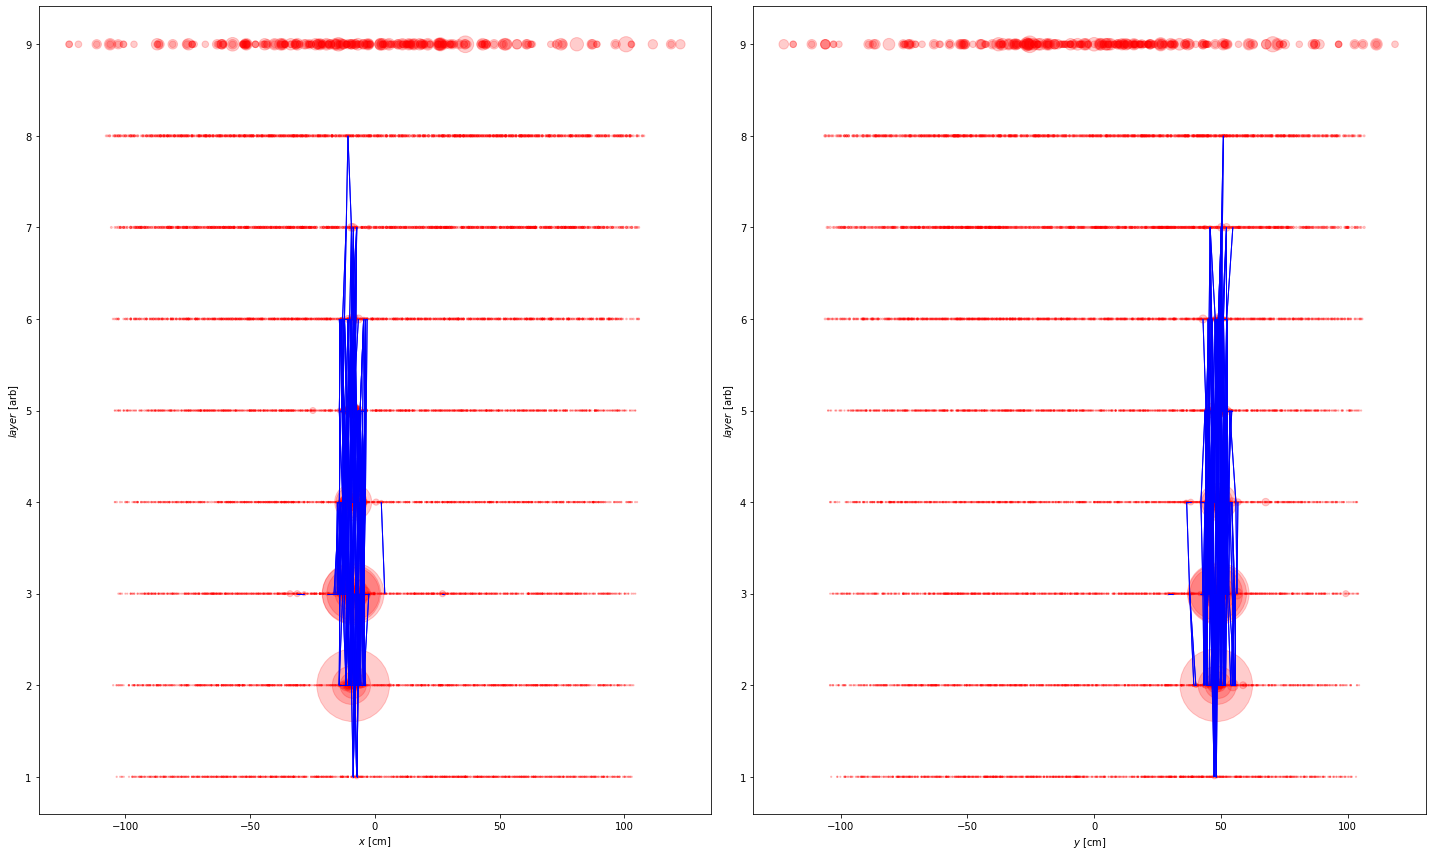

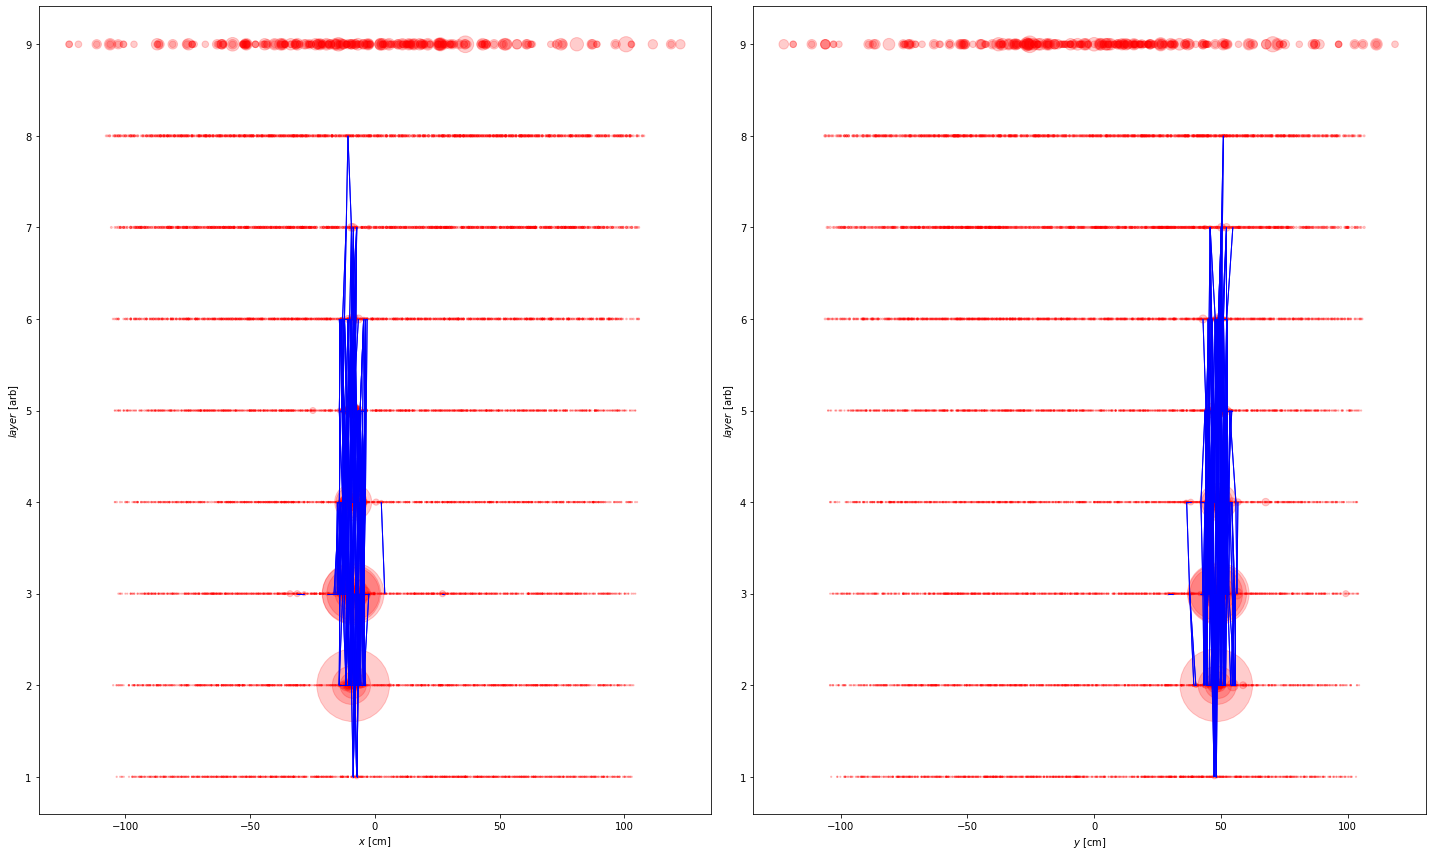

In [65]:
draw_sample(X, Ri, Ro, y, y)

out value: [9.2803793e-06 1.3560241e-05 4.3872863e-04 ... 1.6256460e-14 2.2602922e-12
 3.2196969e-14]
good_outs: [0.5736946  0.65562356 0.95507747 ... 0.9011987  0.90729606 0.99824214]
(2135, 5)


100%|██████████| 2135/2135 [00:00<00:00, 96888.68it/s]


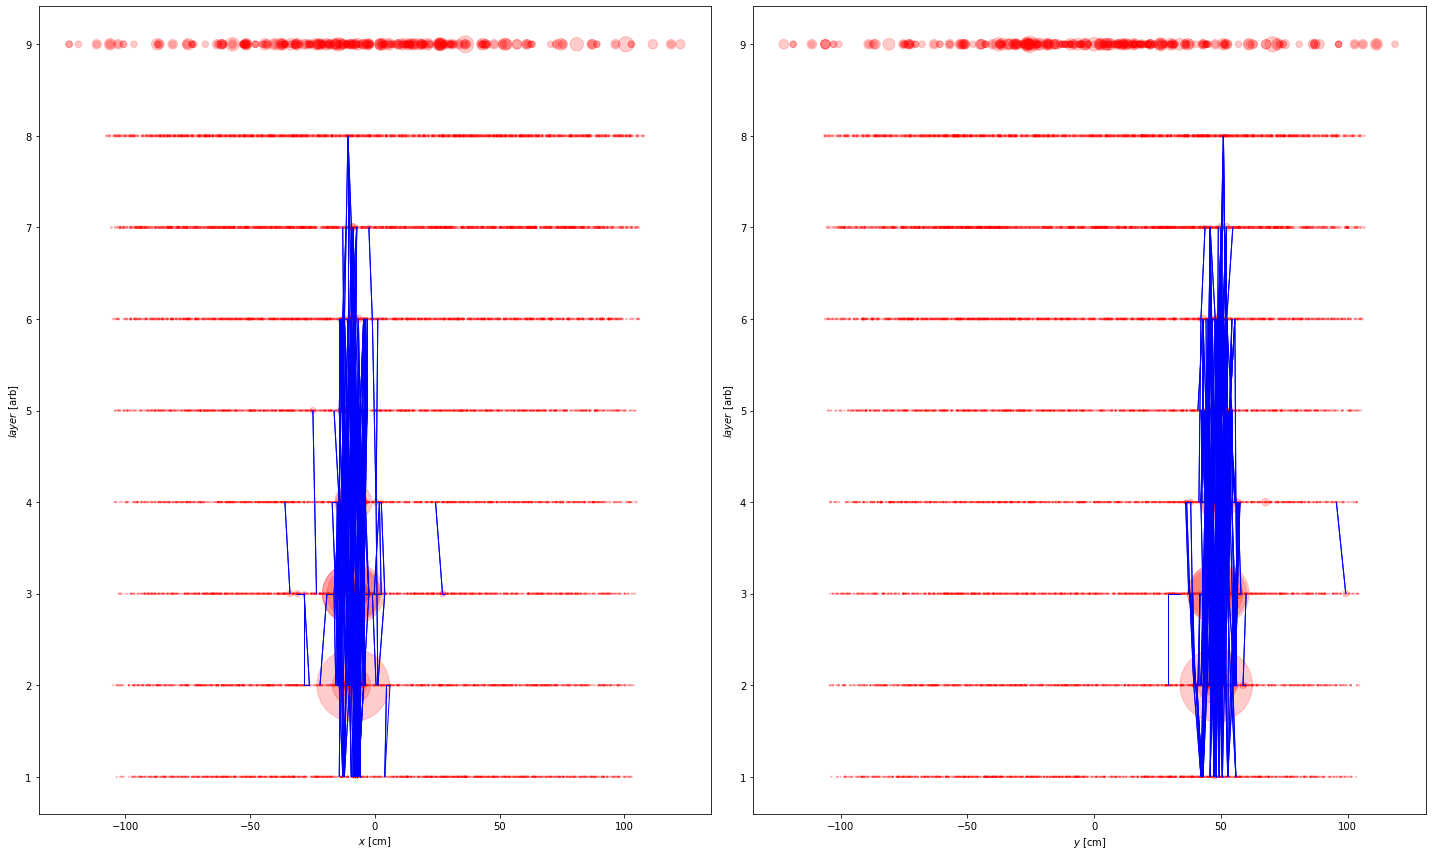

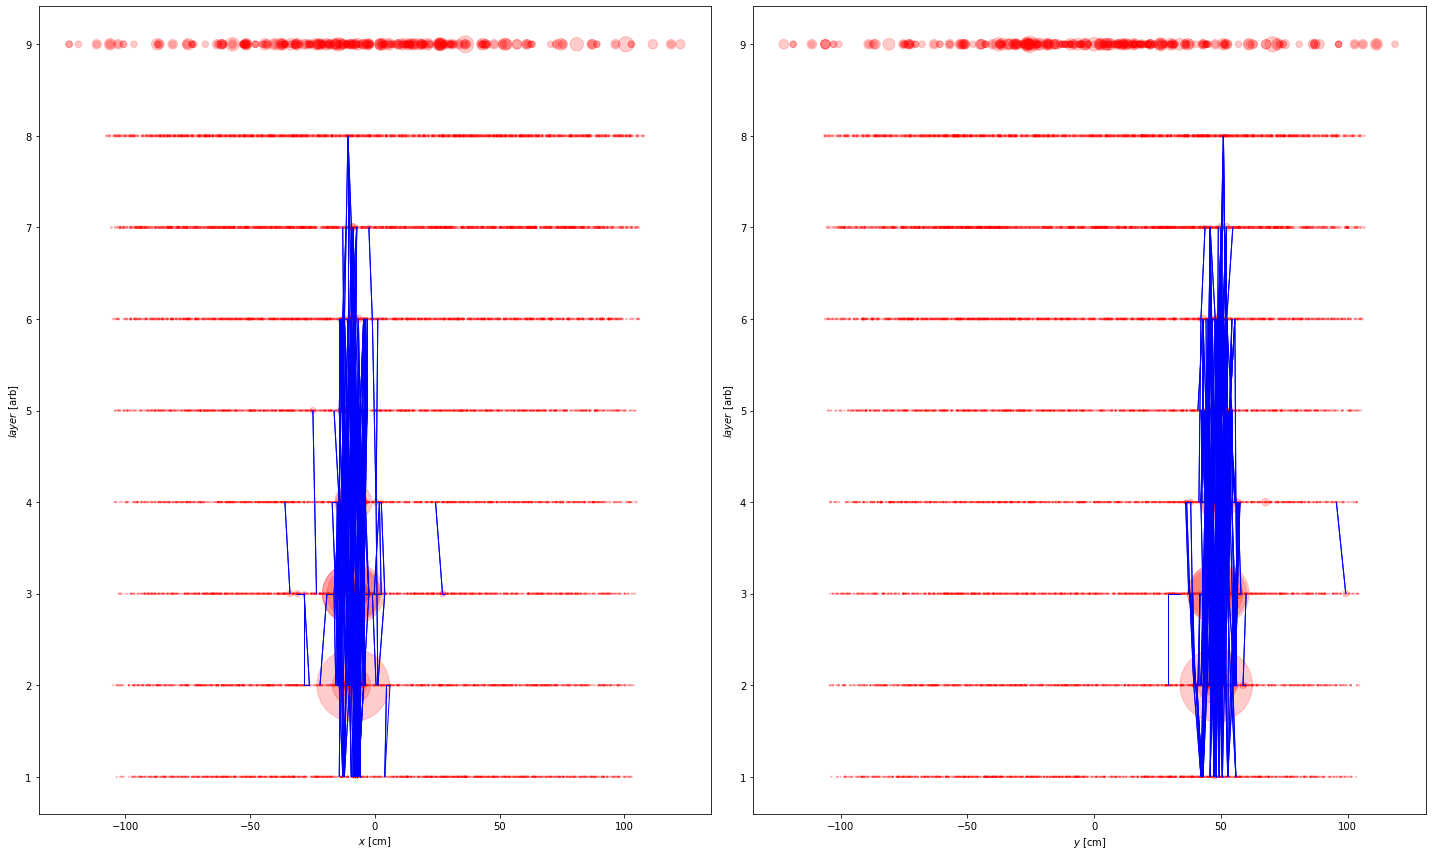

In [66]:
draw_sample(X, Ri, Ro, y, out)

In [67]:
def draw_sample(X, Ri, Ro, y, out,
                cmap='bwr_r', 
                skip_false_edges=True,
                alpha_labels=False, 
                sim_list=None): 
    
    #let's draw only the non-noise edges
#    out_mask = (out >0.5) & (y > 0.5) ### only the correctly predicted signal edges
#    out_mask = (out >0.5) & (y < 0.5) ### only the incorrectly predicted signal edges
#    out_mask =  (y > 0.5) & (out <0.5)  ### signal incorrectly predicted as background
    out_mask =  (y < 0.5) & (out >0.5)  ### background incorrectly predicted as signal
    Ri = Ri[out_mask]
    Ro = Ro[out_mask]
    good_outs = out[out_mask]
    
#    print('out value:',out)
#    print('good_outs:',good_outs)
#    X[:,2]=X[:,2]*150.0
    # Select the i/o node features for each segment    
    feats_o = X[Ro]
    feats_i = X[Ri]  
    
    print(feats_o.shape)
    # Prepare the figure
    fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(20,12))
    cmap = plt.get_cmap(cmap)
    
#    print(X[:,0])
#    print(X[:,1])
    #print(X[:,2]*150.0)
#    print(X[:,4])
    #if sim_list is None:    
        # Draw the hits (layer, x, y)
    #    ax0.scatter(X[:,0], X[:,2], c='k')
    #    ax1.scatter(X[:,1], X[:,2], c='k')
    #else:        
    
    e_max = np.max(X[:,4])
#    e_normed = np.tanh(X[:,4]/e_max)#1. / (1. + np.exp(-X[:,4]/e_max))
    e_normed = 100*X[:,4]
    ax0.scatter(X[:,0], X[:,2], s=(e_normed), c='r',alpha=0.2)
    ax1.scatter(X[:,1], X[:,2], s=(e_normed), c='r',alpha=0.2)
    
    
    
       
    lines0 = []
    lines1 = []
    colors = []
    # Draw the segments    
    if out is not None:
        #t = tqdm.tqdm()
        color_map = {0: (1,1,1,1),
                     1: (0,0,1,1),
                     2: (1,0,0,1),
                     3: (0,1,0,1)}
        
        for j in tqdm.tqdm(range(good_outs.shape[0])):
            
            lines0.append([(feats_o[j,0], feats_o[j,2]),(feats_i[j,0], feats_i[j,2])])
            lines1.append([(feats_o[j,1], feats_o[j,2]),(feats_i[j,1], feats_i[j,2])])
#            colors.append(color_map[good_outs[j]])
            colors.append(color_map[1])
            #_ = ax0.plot([feats_o[j,0], feats_i[j,0]],
            #             [feats_o[j,2], feats_i[j,2]], '-', **seg_args)
            #_ = ax1.plot([feats_o[j,1], feats_i[j,1]],
            #             [feats_o[j,2], feats_i[j,2]], '-', **seg_args)
    else:
        t = tqdm.tqdm(range(y.shape[0]))
        for j in t:
            if y[j]:
                seg_args = dict(c='b', alpha=0.4)
            elif not skip_false_edges:
                seg_args = dict(c='black', alpha=0.4)
            else: continue
                
            ax0.plot([feats_o[j,0], feats_i[j,0]],
                     [feats_o[j,2], feats_i[j,2]], '-', **seg_args)
            ax1.plot([feats_o[j,1], feats_i[j,1]],
                     [feats_o[j,2], feats_i[j,2]], '-', **seg_args)
        
    col_arr = np.array(colors)
    lc0 = mc.LineCollection(lines0, colors=col_arr, linewidths=1)
    lc1 = mc.LineCollection(lines1, colors=col_arr, linewidths=1)
    
    ax0.add_collection(lc0)
    ax1.add_collection(lc1)
    
    # Adjust axes
    ax0.set_xlabel('$x$ [cm]')
    ax1.set_xlabel('$y$ [cm]')
    ax0.set_ylabel('$layer$ [arb]')
    ax1.set_ylabel('$layer$ [arb]')
    plt.tight_layout()
    return fig;
    

100%|██████████| 556/556 [00:00<00:00, 378208.40it/s]

(556, 5)


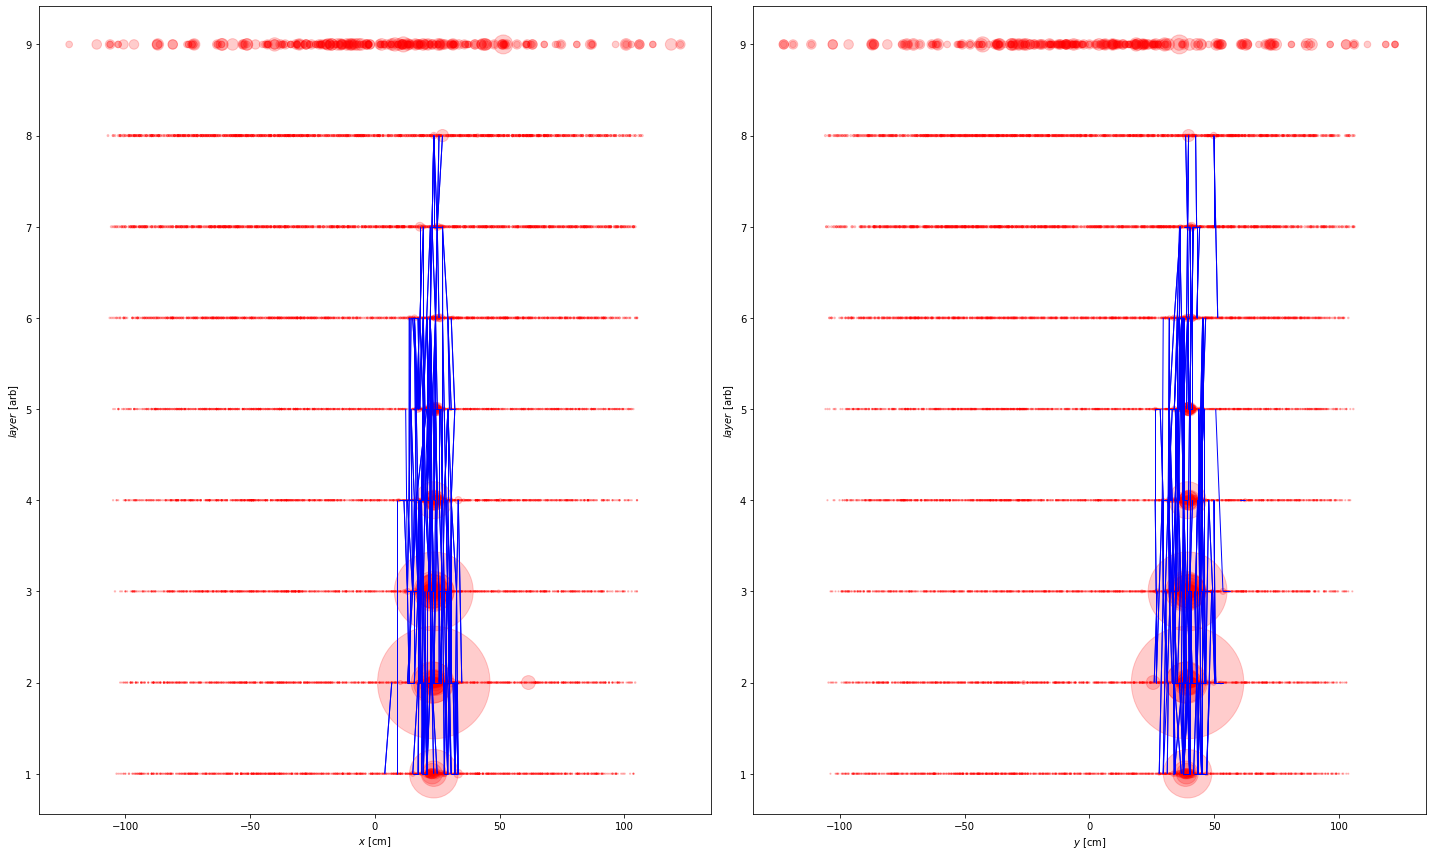

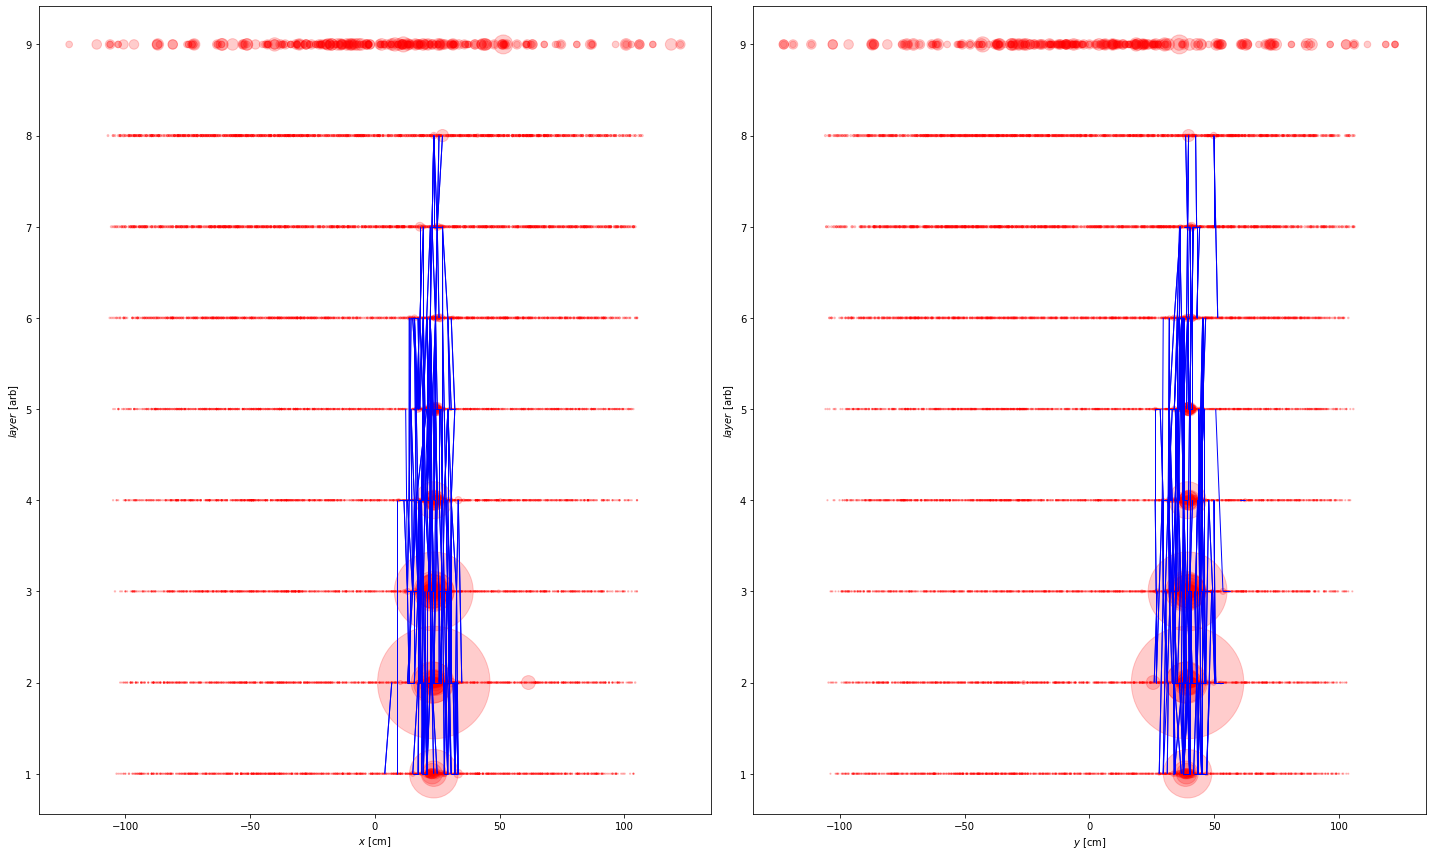

In [24]:
draw_sample(X, Ri, Ro, y, out)

In [12]:
datas = torch.load(test_fname)

In [13]:
datas

Data(edge_index=[2, 65512], x=[10665, 5], y=[65512])

In [14]:
datas.x

tensor([[-4.0897e+01,  1.2084e+00,  1.0000e+00, -1.0000e+00,  1.7270e-02],
        [-4.0897e+01,  2.0140e+00,  1.0000e+00, -1.0000e+00,  1.7270e-02],
        [-4.0200e+01, -1.6112e+00,  1.0000e+00, -1.0000e+00,  1.7270e-02],
        ...,
        [ 1.1134e+01, -9.3425e+00,  9.0000e+00,  0.0000e+00,  8.8299e-01],
        [ 1.3658e+01, -4.9711e+00,  9.0000e+00,  0.0000e+00, -2.6100e-02],
        [ 1.4534e+01,  2.5413e-06,  9.0000e+00,  0.0000e+00,  4.2845e-01]])

In [15]:
X = datas.x.detach().numpy()

In [16]:
X.shape

(10665, 5)

In [17]:
a = np.array([1,2,3])
for i in a:
    print(i)

1
2
3


In [22]:
for i in range(5):
    print(i)

0
1
2
3
4
